# Crisis severity quintile
### PCA analysis

In [1]:
#libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import plotly.express as px

#### Setting up

In [2]:
#import the latest dataset
df1 = pd.read_excel("final_clean.xlsx")

In [3]:
#to avoid reloading the dataset everytime I want to clear the Kernel
df = df1.copy()

In [4]:
df.columns

Index(['X_uuid', 'population_group', 'district', 'governorate',
       'num_hh_member', 'weight', 'year', 'received_aid', 'received_aid_cash',
       'received_aid_food', 'received_aid_water', 'received_aid_fuel',
       'received_aid_shelter', 'received_aid_seasonal_items',
       'received_aid_protection', 'received_aid_education',
       'received_aid_healthcare', 'critical_shelter', 'stress', 'crisis',
       'emergency', 'food_expenditure_share', 'hospital_access_services',
       'clinic_access', 'members_disabled',
       'difficulty_accessing_female_services', 'female_headed',
       'single_headed', 'unemployed_seeking_work', 'insufficient_income',
       'too_much_debt', 'ngo_assistance', 'health_expenses', 'risk_eviction',
       'movement_restriction', 'hh_missing_doc', 'children_missing_doc',
       'adult_distress', 'lack_secure_tenure', 'shelter_2_improvements',
       'imptoved_water_source', 'improved_sanitation', 'treat_water',
       'shelter_apartment', 'shelter_con

In [5]:
#dropping population group = host
df.drop(df[df.population_group < "host"].index, inplace=True) #deleting 1170 observations

In [6]:
#split dataset to train on the first year: 2019
df["year"].unique() #checking that the dataset starts in 2019
X_train =df[df["year"]==2019]
X_test =df[df["year"]!=2019]

In [7]:
#keep only numeric values in the training sets
X_train1 = X_train.drop(["year","X_uuid", "governorate", "district", "weight", "population_group"], axis=1)
X_test1 = X_test.drop(["year","X_uuid", "governorate", "district", "weight", "population_group"], axis=1)

In [8]:
#feature scaling
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train1)
X_test_std = sc.transform(X_test1)
#mean = 0, var=1

### PCA

In [9]:
#PCA
pca = PCA(n_components=5) #note: setting n_components=2 doesnt change anything since we only focus on the first component
 
principalComponents = pca.fit_transform(X_train_std)

#looking at explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.09516223, 0.05395035, 0.04982936, 0.03064452, 0.02778535])

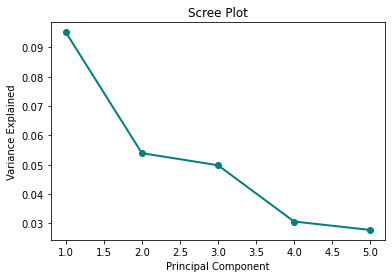

In [10]:
#screeplot pour voir combien de composants sont intéressants
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='teal')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()
#1 ou 2, max 3. pas plus (la ou est le coude)
#plt.savefig('screeplot.pdf')

In [11]:
#creating a dataframe with the Principal components 
principalDF = pd.DataFrame(data=principalComponents, columns=["principalcomponent1", "principalcomponent2", "principalcomponent3", "principalcomponent4", "principalcomponent5"])#,"principal component2" to add if want 2 components in teh df
principalDF

principalcomponent1  principalcomponent2  principalcomponent3  \
0                -1.094201            -2.461033             2.478844   
1                -0.941216             1.506217            -1.878639   
2                -0.773234             1.352980            -2.113864   
3                -0.741656             1.664663            -1.568638   
4                -1.686686            -2.869179             0.165843   
...                    ...                  ...                  ...   
13081             3.354379            -1.360249            -1.967902   
13082             2.614875            -1.113695            -2.091267   
13083             3.322154            -1.142221            -1.901642   
13084             3.338436            -1.324584            -1.890362   
13085             4.082887            -1.418684            -1.786700   

       principalcomponent4  principalcomponent5  
0                -1.163038            -1.353569  
1                -0.737571            -1.142210  
2                -0.885650            -1.005112  
3                -0.363942            -1.235222  
4                -1.990255            -1.606610  
...                    ...                  ...  
13081             0.710901             1.353070  
13082             0.072246             1.187730  
13083             0.981004             1.365047  
13084             0.988961             1.128313  
13085             1.122674             1.619972  

[13086 rows x 5 columns]

In [12]:
#setting the index similar to X_train to be able to merge the datasets afterwards
index= X_train.index.tolist()
index2= principalDF.index.tolist()
principalDF = principalDF.rename(index=dict(zip(principalDF.index.tolist(),X_train.index.tolist())))

In [13]:
#concatenating the df for 2019 to add the PCAscores
final2019 = pd.concat([X_train, principalDF], axis=1).reindex(X_train.index)
final2019

X_uuid population_group   district  \
21723  9029b9ba-ac7b-4cf5-a41f-08e20342f465         returnee    al.kaim   
21724  94e5a612-f3f9-40a6-8d46-290add7ac2da         returnee    haditha   
21725  270a95ae-70ea-48f1-a368-b7bf9830f228         returnee    haditha   
21726  21f64d7a-be10-43cd-af7b-be6e3eb7558a         returnee    haditha   
21727  a848c2da-ce5d-45d1-9b36-fca3f58947fc         returnee    haditha   
...                                     ...              ...        ...   
34804  2cb0c5e8-defd-4742-9ae7-ca9fbf3033c6      idp_in_camp  al.risafa   
34805  b00b7d00-1a47-4094-a183-6117832038b0      idp_in_camp  al.risafa   
34806  e2367bfd-6cc9-4aef-8561-1adc996ddaee      idp_in_camp  al.risafa   
34807  e4a9bd5f-ad71-4536-9bed-e85daeeb62cc      idp_in_camp  al.risafa   
34808  e6c44c05-5aef-4235-84c5-344ad99e1597      idp_in_camp  al.risafa   

      governorate  num_hh_member    weight  year  received_aid  \
21723    al.anbar            3.0  0.570013  2019             0   
21724    al.anbar            6.0  0.566869  2019             0   
21725    al.anbar            5.0  0.566869  2019             0   
21726    al.anbar            8.0  0.566869  2019             0   
21727    al.anbar            5.0  0.566869  2019             0   
...           ...            ...       ...   ...           ...   
34804     baghdad            2.0  0.033640  2019             1   
34805     baghdad            4.0  0.033640  2019             1   
34806     baghdad            5.0  0.033640  2019             1   
34807     baghdad            2.0  0.033640  2019             1   
34808     baghdad            2.0  0.033640  2019             1   

       received_aid_cash  received_aid_food  ...  children_working_1.0  \
21723                  0                  0  ...                     0   
21724                  0                  0  ...                     0   
21725                  0                  0  ...                     0   
21726                  0                  0  ...                     0   
21727                  0                  0  ...                     0   
...                  ...                ...  ...                   ...   
34804                  0                  0  ...                     0   
34805                  0                  0  ...                     0   
34806                  0                  0  ...                     0   
34807                  0                  0  ...                     0   
34808                  0                  0  ...                     0   

       child_distress_0.0  child_distress_1.0  child_married_0.0  \
21723                   0                   0                  0   
21724                   1                   0                  1   
21725                   1                   0                  1   
21726                   1                   0                  1   
21727                   0                   0                  0   
...                   ...                 ...                ...   
34804                   0                   0                  0   
34805                   0                   0                  0   
34806                   0                   0                  0   
34807                   0                   0                  0   
34808                   0                   0                  0   

       child_married_1.0  principalcomponent1  principalcomponent2  \
21723                  0            -1.094201            -2.461033   
21724                  0            -0.941216             1.506217   
21725                  0            -0.773234             1.352980   
21726                  0            -0.741656             1.664663   
21727                  0            -1.686686            -2.869179   
...                  ...                  ...                  ...   
34804                  0             3.354379            -1.360249   
34805                  0             2.614875            -1.113695   
34806  

### applying the PCA to 2020 and 2021 (using the pca fitted on 2019)

In [14]:
#applying to the rest of the panel years
principalComponentslater = pca.transform(X_test_std)
principalComponentslater

array([[ 0.31649626,  1.52064095,  1.40569787,  2.29786487, -0.78931457],
       [-0.52524538, -2.71513966,  1.43300516, -1.20445106, -0.52628542],
       [-1.57231125, -2.55104951,  2.48462858, -1.44701955,  1.44345683],
       ...,
       [ 1.13241492,  2.20200948,  3.6291539 ,  2.30181923,  2.20358081],
       [-0.99564966,  1.60130716,  0.41467549,  0.45252463,  0.73488187],
       [-2.55175009,  1.14007708,  2.30796545, -2.11107066,  1.11963902]])

In [15]:
#creating a dataframe with the Principal components - code works for n_components=1
principalDF2021 = pd.DataFrame(data=principalComponentslater, columns=["principalcomponent1", "principalcomponent2", "principalcomponent3", "principalcomponent4", "principalcomponent5"])
principalDF2021

#setting the index similar to X_train to be able to merge the datasets afterwards
index= X_test.index.tolist()
index2= principalDF2021.index.tolist()
principalDF2021 = principalDF2021.rename(index=dict(zip(index2,index)))

#concatenating the df for 2019 to add the PCAscores
final2021= pd.concat([X_test, principalDF2021], axis=1).reindex(X_test.index)
final2021


X_uuid population_group      district  \
0      14c9f242-8eb3-4f00-b724-60e51d9d244e     idp_out_camp      al.hilla   
1      10ec8c64-4f0b-45c9-a44e-7a50619757b4         returnee  al.muqdadiya   
2      8929207e-4cff-4089-b626-69bd00039676         returnee  al.muqdadiya   
3      b5ef8e6c-0ca7-46bb-a901-67a957e3aa0a         returnee  al.muqdadiya   
4      2be976e3-795d-4a09-8a56-e4f0a67811ad         returnee  al.muqdadiya   
...                                     ...              ...           ...   
21718  e262a65b-afac-4caa-8a10-bb4f07437d5f     idp_out_camp   al.nasiriya   
21719  e3a041b5-b11b-4c2b-8b6c-5b9dacf89b98     idp_out_camp   al.nasiriya   
21720  e7b60bc6-1f19-4ffa-8f16-7136c1d3eab9     idp_out_camp   al.nasiriya   
21721  ece3b64b-574f-4a02-aeb8-3c12d7204516     idp_out_camp   al.nasiriya   
21722  f8b78c02-da35-4844-8d20-0dfa0c974b0a     idp_out_camp   al.nasiriya   

      governorate  num_hh_member    weight  year  received_aid  \
0           babil            9.0  0.032164  2021             1   
1          diyala            8.0  0.570485  2021             0   
2          diyala           12.0  0.570485  2021             0   
3          diyala            4.0  0.570485  2021             0   
4          diyala            3.0  0.570485  2021             0   
...           ...            ...       ...   ...           ...   
21718     thi.qar            2.0  0.036467  2020             0   
21719     thi.qar            4.0  0.036467  2020             0   
21720     thi.qar            7.0  0.036467  2020             1   
21721     thi.qar            6.0  0.036467  2020             0   
21722     thi.qar            5.0  0.036467  2020             0   

       received_aid_cash  received_aid_food  ...  children_working_1.0  \
0                      0                  1  ...                     0   
1                      0                  0  ...                     0   
2                      0                  0  ...                     0   
3                      0                  0  ...                     0   
4                      0                  0  ...                     0   
...                  ...                ...  ...                   ...   
21718                  0                  0  ...                     0   
21719                  0                  0  ...                     0   
21720                  0                  1  ...                     0   
21721                  0                  0  ...                     0   
21722                  0                  0  ...                     0   

       child_distress_0.0  child_distress_1.0  child_married_0.0  \
0                       1                   0                  1   
1                       0                   0                  0   
2                       0                   0                  0   
3                       0                   0                  0   
4                       1                   0                  1   
...                   ...                 ...                ...   
21718                   1                   0                  1   
21719                   1                   0                  1   
21720                   1                   0                  1   
21721                   1                   0                  1   
21722                   1                   0                  1   

       child_married_1.0  principalcomponent1  principalcomponent2  \
0                      0             0.316496             1.520641   
1                      0            -0.525245            -2.715140   
2                      0            -1.572311            -2.551050   
3                      0            -0.912242            -2.721322   
4                      0            -1.446900            -1.573385   
...                  ...                  ...                  ...   
21718                  0            -1.926624             0.180931   
21719                  0            -2.01

### Combining the final dataset and plotting it

In [16]:
#combining the df for 2019 and that for 20-21
dffinal = pd.concat([final2021,final2019])
dffinal

X_uuid population_group      district  \
0      14c9f242-8eb3-4f00-b724-60e51d9d244e     idp_out_camp      al.hilla   
1      10ec8c64-4f0b-45c9-a44e-7a50619757b4         returnee  al.muqdadiya   
2      8929207e-4cff-4089-b626-69bd00039676         returnee  al.muqdadiya   
3      b5ef8e6c-0ca7-46bb-a901-67a957e3aa0a         returnee  al.muqdadiya   
4      2be976e3-795d-4a09-8a56-e4f0a67811ad         returnee  al.muqdadiya   
...                                     ...              ...           ...   
34804  2cb0c5e8-defd-4742-9ae7-ca9fbf3033c6      idp_in_camp     al.risafa   
34805  b00b7d00-1a47-4094-a183-6117832038b0      idp_in_camp     al.risafa   
34806  e2367bfd-6cc9-4aef-8561-1adc996ddaee      idp_in_camp     al.risafa   
34807  e4a9bd5f-ad71-4536-9bed-e85daeeb62cc      idp_in_camp     al.risafa   
34808  e6c44c05-5aef-4235-84c5-344ad99e1597      idp_in_camp     al.risafa   

      governorate  num_hh_member    weight  year  received_aid  \
0           babil            9.0  0.032164  2021             1   
1          diyala            8.0  0.570485  2021             0   
2          diyala           12.0  0.570485  2021             0   
3          diyala            4.0  0.570485  2021             0   
4          diyala            3.0  0.570485  2021             0   
...           ...            ...       ...   ...           ...   
34804     baghdad            2.0  0.033640  2019             1   
34805     baghdad            4.0  0.033640  2019             1   
34806     baghdad            5.0  0.033640  2019             1   
34807     baghdad            2.0  0.033640  2019             1   
34808     baghdad            2.0  0.033640  2019             1   

       received_aid_cash  received_aid_food  ...  children_working_1.0  \
0                      0                  1  ...                     0   
1                      0                  0  ...                     0   
2                      0                  0  ...                     0   
3                      0                  0  ...                     0   
4                      0                  0  ...                     0   
...                  ...                ...  ...                   ...   
34804                  0                  0  ...                     0   
34805                  0                  0  ...                     0   
34806                  0                  0  ...                     0   
34807                  0                  0  ...                     0   
34808                  0                  0  ...                     0   

       child_distress_0.0  child_distress_1.0  child_married_0.0  \
0                       1                   0                  1   
1                       0                   0                  0   
2                       0                   0                  0   
3                       0                   0                  0   
4                       1                   0                  1   
...                   ...                 ...                ...   
34804                   0                   0                  0   
34805                   0                   0                  0   
34806                   0                   0                  0   
34807                   0                   0                  0   
34808                   0                   0                  0   

       child_married_1.0  principalcomponent1  principalcomponent2  \
0                      0             0.316496             1.520641   
1                      0            -0.525245            -2.715140   
2                      0            -1.572311            -2.551050   
3                      0            -0.912242            -2.721322   
4                      0            -1.446900            -1.573385   
...                  ...                  ...                  ...   
34804                  0             3.354379            -1.360249   
34805                  0             2.61

array([[<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>],
       [<AxesSubplot:title={'center':'2021'}>, <AxesSubplot:>]],
      dtype=object)

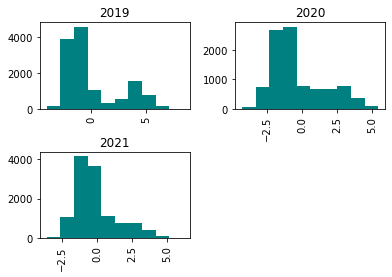

In [17]:
dffinal['principalcomponent1'].hist(by=df['year'], color="teal")

### Creating the quintiles based on 2019

In [18]:
#dividing 2019 into quintiles
dffinal['quintile'] = pd.qcut(dffinal[dffinal["year"]==2019]["principalcomponent1"], 5, labels=["1","2","3","4","5"])

In [19]:
#saved the bins in a list we can access
result, bins = pd.qcut(
    dffinal[dffinal["year"]==2019]["principalcomponent1"], 
    5,                  # A single number value
    retbins=True
)
bins 

array([-4.07396822, -1.90833193, -1.3291179 , -0.75403439,  2.75594344,
        8.37321619])

<AxesSubplot:ylabel='Density'>

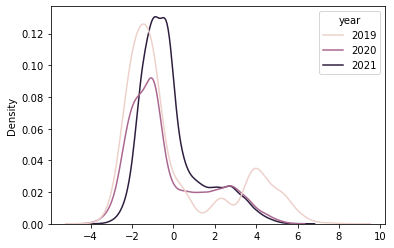

In [20]:
sns.kdeplot(np.array(dffinal["principalcomponent1"]), hue=df["year"])

<AxesSubplot:ylabel='Density'>

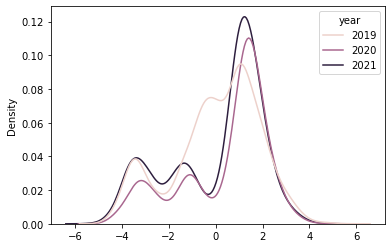

In [21]:
sns.kdeplot(np.array(dffinal["principalcomponent2"]), hue=df["year"])

### Attributing a quintile to each observation in 2020 and 2021 based on the bins of 2019

In [22]:
bins

array([-4.07396822, -1.90833193, -1.3291179 , -0.75403439,  2.75594344,
        8.37321619])

In [23]:
#first bin
dffinal["quintile"] = np.where((dffinal["principalcomponent1"]< bins[1]) & (dffinal.year !=2019),1,dffinal["quintile"] )
#bin2 
dffinal["quintile"] =np.where((dffinal.principalcomponent1> bins[1]) & (dffinal.principalcomponent1<= bins[2]) & (dffinal.year !=2019),2,dffinal["quintile"])
#bin 3
dffinal["quintile"] =np.where((dffinal.principalcomponent1> bins[2]) & (dffinal.principalcomponent1<= bins[3]) & (dffinal.year !=2019),3,dffinal["quintile"])
#bin4
dffinal["quintile"] =np.where((dffinal.principalcomponent1> bins[3]) & (dffinal.principalcomponent1<= bins[4]) & (dffinal.year !=2019),4,dffinal["quintile"])
#bin5
dffinal["quintile"] = np.where((dffinal["principalcomponent1"]> bins[4]) & (dffinal.year !=2019),5,dffinal["quintile"] )

array([[<AxesSubplot:title={'center':'2019'}>,
        <AxesSubplot:title={'center':'2020'}>],
       [<AxesSubplot:title={'center':'2021'}>, <AxesSubplot:>]],
      dtype=object)

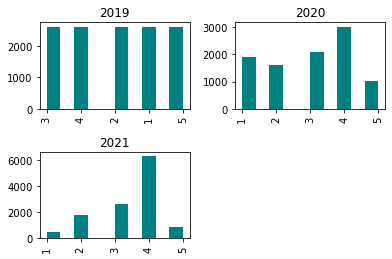

In [24]:
dffinal['quintile'].hist(by=dffinal['year'], color="teal")

#### Exporting the dataset with the 5 components and the quintiles to excel dataset

In [25]:
dffinal.to_excel("pca_full_1.xlsx", index=False)  

#### plotting the components one against the other

In [26]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    principalComponents,
    labels=labels,
    dimensions=range(4),
    color=dffinal[dffinal["year"]==2019]["quintile"]
)
fig.update_traces(diagonal_visible=False)
fig.show()
#color code: the quintile numbers

## Looking at which variables play an important role in the first component of the PCA to understand better the analysis

In [27]:
#PCA with 5 components to see what each looks like (exploratory)
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_train_std)

#looking at explained variance
explained_variance = pca.explained_variance_ratio_
explained_variance #the first component explains 12.3% of the variance

array([0.09516223, 0.05395035, 0.04982946, 0.03075609, 0.02778825])

In [28]:
components = pca.components_

#### Making a dataframe with the weight of each variable in each component

In [29]:
dfcomponents = pd.DataFrame(data=components).T#,"principal component2" to add if want 2 components in teh df
dfcomponents.rename(columns={0: 'Component1', 1: 'Component2', 2: 'Component3', 3: 'Component4', 4: 'Component5'}, inplace=True)

In [30]:
oldindex= dfcomponents.index.tolist()
newindex = X_train1.columns.tolist()

In [31]:
dfcomponents = dfcomponents.rename(index=dict(zip(oldindex,newindex)))
dfcomponents.drop(dfcomponents.tail(4).index, inplace=True) #to solve a small bug where the 4 last lines were repeated variables
dfcomponents

Component1  Component2  Component3  Component4  \
num_hh_member                    0.017596    0.241689    0.052146   -0.075767   
received_aid                     0.317812   -0.053068    0.027207    0.008624   
received_aid_cash                0.235968   -0.047956    0.003653   -0.100811   
received_aid_food                0.293310   -0.044159    0.024241    0.013724   
received_aid_water               0.071578   -0.006625    0.051944    0.067973   
...                                   ...         ...         ...         ...   
not_attending_formal_no_child   -0.169549   -0.417644    0.110670   -0.100070   
dropped_from_school_0.0          0.175711    0.403905   -0.125158    0.109743   
dropped_from_school_1.0         -0.037096    0.047597    0.074513   -0.050905   
children_working_0.0             0.138185    0.314476   -0.180167    0.037476   
children_working_1.0            -0.067953    0.093219    0.063453   -0.001098   

                               Component5  
num_hh_member                    0.064198  
received_aid                     0.098769  
received_aid_cash                0.152219  
received_aid_food                0.066349  
received_aid_water               0.109564  
...                                   ...  
not_attending_formal_no_child   -0.110419  
dropped_from_school_0.0          0.102349  
dropped_from_school_1.0          0.033911  
children_working_0.0            -0.098237  
children_working_1.0             0.189444  

[68 rows x 5 columns]

In [32]:
#absolute values
dfcomponents["Component1abs"] = abs(dfcomponents["Component1"])
dfcomponents["Component2abs"] = abs(dfcomponents["Component2"])
dfcomponents["Component3abs"] = abs(dfcomponents["Component3"])
dfcomponents["Component4abs"] = abs(dfcomponents["Component4"])
dfcomponents["Component5abs"] = abs(dfcomponents["Component5"])

#### Component 1 - Shelter and aid

Component centered around shelter situation, and aid.
direction: higher component 1 = worst situation

In [33]:
dfcomponents.nlargest(10, ['Component1abs']).Component1
#shelter and and aid (top5)

critical_shelter                 0.341468
received_aid                     0.317812
shelter_house                   -0.310897
shelter_tent                     0.301327
received_aid_food                0.293310
received_aid_cash                0.235968
not_attending_formal_0.0         0.221941
ngo_assistance                   0.206504
dropped_from_school_0.0          0.175711
not_attending_formal_no_child   -0.169549
Name: Component1, dtype: float64

#### Component 2 -  HH head and composition, and shelter

Component centered around HH composition (children, number of hh members), and on education (children working vs education). direction: higher component 2 = mixed

In [34]:
dfcomponents.nlargest(10, ['Component2abs']).Component2 


not_attending_formal_no_child   -0.417644
dropped_from_school_0.0          0.403905
children_working_0.0             0.314476
not_attending_formal_0.0         0.248553
num_hh_member                    0.241689
not_attending_formal_1.0         0.205775
children_missing_doc             0.138600
members_disabled                 0.136897
too_much_debt                    0.130329
hh_missing_doc                   0.119355
Name: Component2, dtype: float64

##### Component 3 - FCS

Focused on disabilities, and food consumption score. higher = worst situation (clearly)

In [35]:
dfcomponents.nlargest(10, ['Component3abs']).Component3

members_disabled                        0.274841
difficulty_disability_yes               0.246454
fcs_Acceptable                         -0.234132
emergency                               0.220870
adult_distress                          0.208917
fcs_Borderline                          0.200920
not_attending_formal_0.0               -0.196583
crisis                                  0.193298
improved_sanitation                    -0.186527
difficulty_accessing_female_services    0.186347
Name: Component3, dtype: float64

##### Component 4 -  

Focus on nutrition. higher = lower nutrition

In [36]:
dfcomponents.nlargest(10, ['Component4abs']).Component4

fcs_Acceptable             -0.461330
hh_missing_doc             -0.430746
children_missing_doc       -0.428109
fcs_Borderline              0.418561
fcs_Poor                    0.173731
not_attending_formal_0.0    0.139867
hospital_access_services    0.118164
food_expenditure_share     -0.116612
movement_restriction        0.110999
dropped_from_school_0.0     0.109743
Name: Component4, dtype: float64

##### Component 5 - 

In [37]:
dfcomponents.nlargest(10, ['Component5abs']).Component5

children_missing_doc        -0.349103
hh_missing_doc              -0.342757
single_headed                0.296053
female_headed                0.295923
members_disabled             0.261700
fcs_Acceptable               0.260334
fcs_Borderline              -0.225822
difficulty_disability_yes    0.220652
children_working_1.0         0.189444
received_aid_cash            0.152219
Name: Component5, dtype: float64